<center> <h2> Data Structure Exploration </h2> </center>
    
###  I. Data Source

The data was downloaded from the Kaggle website (https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). 
It was provided by Clément Bisaillon who acknowledged the following sources:

> Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018

> Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).


### II. Loading the data


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os, re, random
import pandas as pd
import numpy as np
from utils.utils_display import load_data, display_random_article

In [3]:
filepath = './data/rawdata/'
data = load_data(filepath)

In [4]:
data.head(5)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True


In [5]:
display_random_article(data)

**Title:** Rohingya refugees 'drained' by trauma, says U.N. refugee chief

**Date:** November 22, 2017 ; **Subject:** worldnews ; **Label:** True

**Text:** SEOUL (Reuters) - Hundreds of thousands of Rohingya Muslims who fled to Bangladesh from violence in Myanmar have been  drained  by the trauma they suffered during the crisis and a struggle to overcome desperate want, the United Nations refugee chief said on Wednesday. More than 600,000 Rohingya have fled Buddhist-majority Myanmar since late August this year for neighboring Bangladesh, driven out by a military clearance operation in Rakhine State. The refugees  suffering has caused an international outcry, spurring appeals by aid agencies for millions of dollars in funds to tackle the crisis.  I found this was a population that had almost no response. Very passive,  said Filippo Grandi, the U.N. high commissioner for refugees, describing his visit late in September to camps where the refugees were staying.  You almost felt there was nothing left and that everything had been drained by this,  he told Reuters in an interview in his first visit to the South Korean capital. He saw the lassi... (*max_characters* = 1000)

In [6]:
print('Number of TRUE news :',len(data.loc[data['label']=='True']))
print('Number of FAKE news :',len(data.loc[data['label']=='Fake']))

Number of TRUE news : 21417
Number of FAKE news : 23481


### III. Text structure exploration and engineering

#### A) Metadata processing

Before looking at the content of the text we try to process its general structure to see of some of the more general attributes (text length, ratio of uppercase to lowercase...) seem to help distinguish True from Fake news. The list of features created so far include:

* **title_length**
* **title_uppercase**
* **title_lowercase**
* **title_uppercase_count**
* **text_length**
* **text_uppercase**
* **text_lowercase**
* **avg_sent_legnth**
* **text_uppercase_count**

Other maybe relevant features (for future works... **SEE PART IV**):

* **digit_count**
* **special_character_counts**
* ...

In [7]:
from utils.utils_metadata import metadata_engineering

In [8]:
data = metadata_engineering(data)

In [9]:
features = [col for col in data.columns if col not in ['title','text','subject','date','processed_date']]

In [10]:
data[features].head()

,label,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_length,text_uppercase,text_lowercase,avg_sent_length,text_uppercase_count
0,True,64,0.062500,0.750000,1,4659,0.033269,0.765615,109.761905,12
1,True,64,0.062500,0.765625,1,4077,0.029188,0.789061,126.250000,7
2,True,60,0.116667,0.633333,1,2789,0.041951,0.765149,131.761905,7
3,True,59,0.135593,0.694915,2,2461,0.044697,0.772857,135.555556,4
4,True,69,0.057971,0.768116,0,5204,0.038432,0.754228,100.901961,15


#### B) Descriptive Statistics

In [11]:
data.loc[data['label']=='True',features].describe()

,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_length,text_uppercase,text_lowercase,avg_sent_length,text_uppercase_count
count,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000,21417.000000
mean,64.667881,0.055351,0.778032,0.388103,2383.278517,0.041736,0.762271,135.015862,6.716674
std,9.168999,0.027809,0.050817,0.579345,1684.835730,0.015244,0.021667,32.919115,6.809233
min,26.000000,0.010526,0.385965,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,59.000000,0.034483,0.750000,0.000000,914.000000,0.031735,0.753744,117.750000,3.000000
50%,64.000000,0.050847,0.783784,0.000000,2222.000000,0.038162,0.765870,134.666667,5.000000
75%,70.000000,0.070175,0.813559,1.000000,3237.000000,0.047619,0.775194,151.111111,9.000000
max,133.000000,0.264151,0.906250,5.000000,29781.000000,0.220690,0.814815,909.500000,214.000000


In [12]:
data.loc[data['label']=='Fake',features].describe()

,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_length,text_uppercase,text_lowercase,avg_sent_length,text_uppercase_count
count,23481.000000,23481.000000,23481.000000,23481.000000,23481.000000,23481.000000,23481.000000,23481.000000,23481.000000
mean,94.198032,0.295013,0.515103,3.254759,2547.396235,0.045500,0.730886,121.427724,8.915634
std,27.184433,0.140473,0.142546,2.970239,2532.884399,0.045821,0.131711,46.107691,12.835438
min,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,77.000000,0.198198,0.455882,1.000000,1433.000000,0.029338,0.741228,99.130435,2.000000
50%,90.000000,0.265625,0.540000,3.000000,2166.000000,0.036745,0.761240,119.705882,5.000000
75%,105.000000,0.351648,0.609756,5.000000,3032.000000,0.048458,0.773757,142.458333,11.000000
max,286.000000,0.895833,0.874999,24.000000,51794.000000,0.882352,0.848276,1099.000000,309.000000


#### C) Observing Feature Correlation

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
def get_indices(label,size = 500):
    return list(np.random.choice(data.loc[data['label']==label].index,replace=False,size=size))

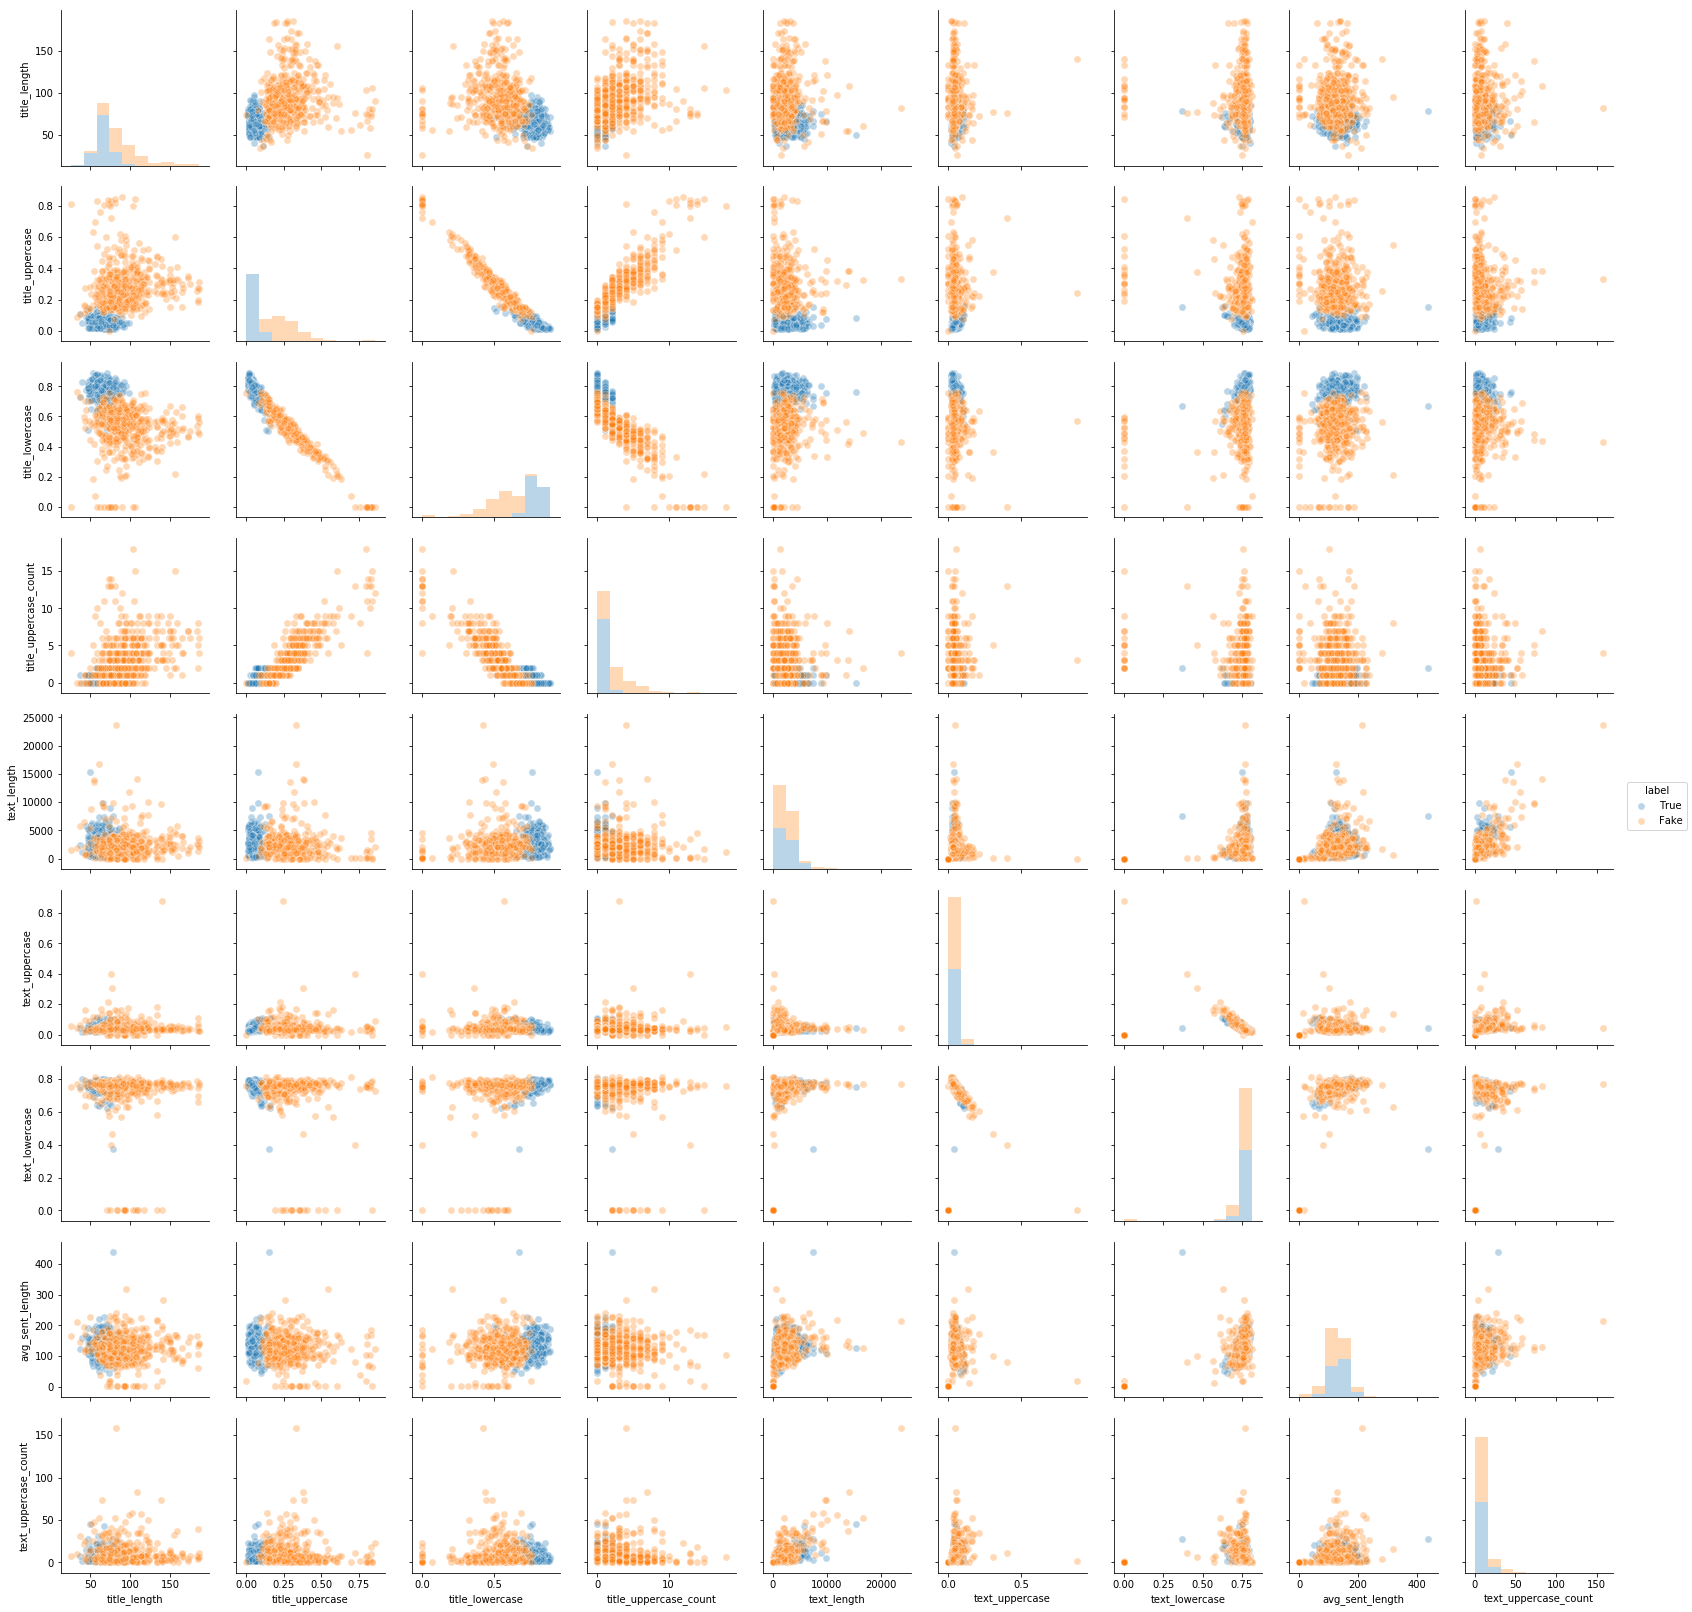

In [15]:
indices = get_indices('True',size = 500) + get_indices('Fake',size = 500)
sns.pairplot(data.loc[indices,features], hue="label",
             kind='scatter', plot_kws=dict(s=50, alpha=0.3), diag_kws=dict(alpha=0.3))
plt.show()
#plt.savefig('./images/structure_feature_plot.pdf',bbox_inches='tight')

### IV. Exploring Digits Counts & Special Characters

In [17]:
from utils.utils_metadata import process_row, update, distributionCharacters

In [18]:
true_data = {}
for true in data.loc[data['label']=='True','text']:
    true_data = update(true_data, distributionCharacters(true))
    
fake_data = {}
for fake in data.loc[data['label']=='Fake','text']:
    fake_data = update(fake_data, distributionCharacters(fake))

In [19]:
subdf = []
for index,row in data.iterrows():
    subdf += process_row(row)
subdf = pd.DataFrame(subdf,columns=['char','count','label'])

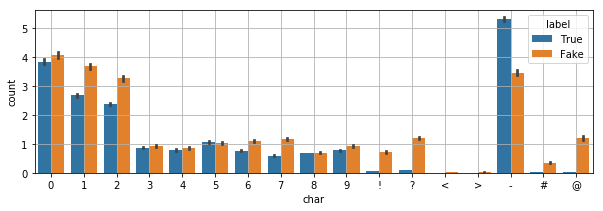

In [20]:
plt.rcParams['figure.figsize'] = (10,3)
sns.barplot(x="char", y="count", hue="label", data=subdf, linewidth=1)
plt.grid(True)
plt.show()
#plt.savefig('./images/count_characters.pdf',bbox_inches='tight')

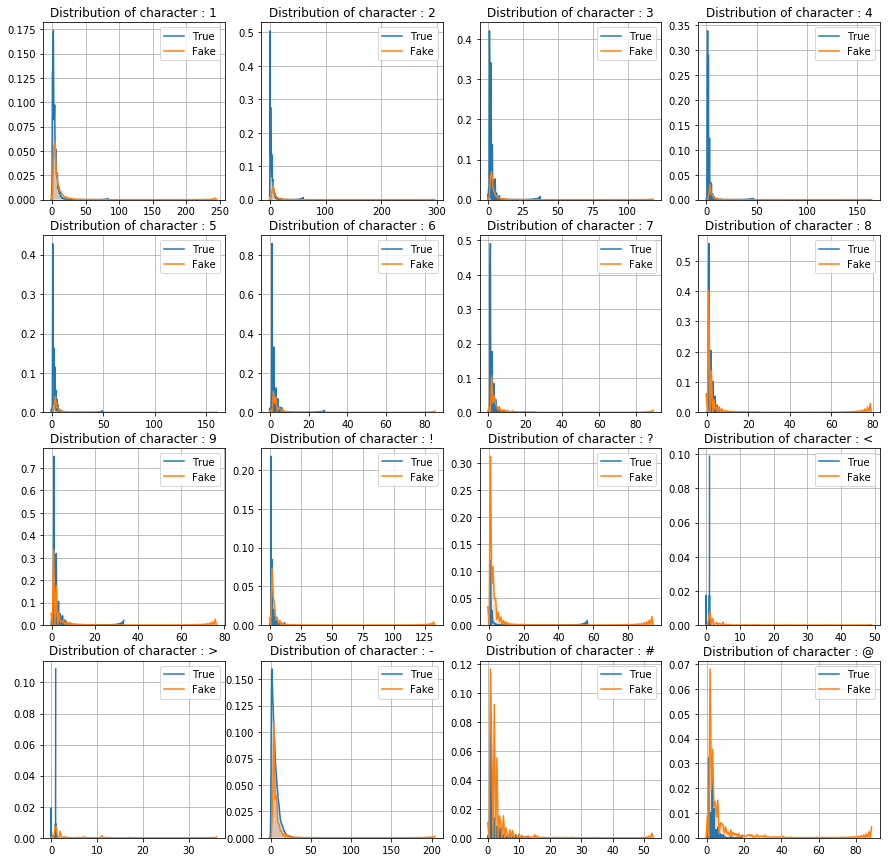

In [21]:
plt.rcParams['figure.figsize'] = (15,15)
for i,key in enumerate(list(true_data.keys())[1:]):
    plt.subplot(4,4,i+1)
    plt.title('Distribution of character : {}'.format(key))
    plt.grid(True)
    sns.kdeplot(true_data[key], shade=True, label = 'True')
    sns.kdeplot(fake_data[key], shade=True, label = 'Fake')
plt.show()

### V. True Fake vs Date

In [22]:
time = data[['processed_date','label']].sort_values('processed_date').dropna()
time.index = pd.to_datetime(time['processed_date'])
time = pd.get_dummies(time['label'])

In [23]:
temp = time.resample('M').agg({'Fake':'sum','True':'sum'})

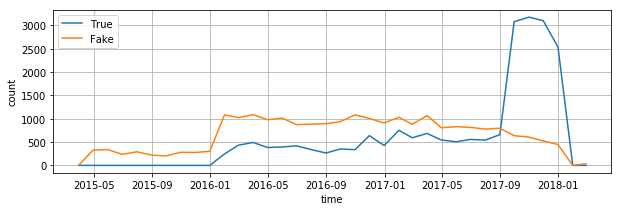

In [24]:
plt.rcParams['figure.figsize'] = (10,3)
plt.grid(True)
plt.plot(temp.index,temp['True'],label='True')
plt.plot(temp.index,temp['Fake'],label='Fake')
plt.ylabel('count')
plt.xlabel('time')
plt.legend()
plt.show()
#plt.savefig('./images/count_time.pdf',bbox_inches='tight')

Will not include the date. This could introduce a severe bias into the model from the data collection process and further lead to extrapolation.

### VI. Final Structure Engineering Function Output with Normalization of feature + Correlation Matrix

#### Feature Correlation

In [26]:
from utils.utils_metadata import structure_engineering

In [27]:
filepath = './data/rawdata/'
data = load_data(filepath)

In [28]:
data = structure_engineering(data)

In [29]:
data.head()

,title,text,subject,date,label,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_length,...,count_(7),count_(8),count_(9),count_(!),count_(?),count_(<),count_(>),count_(-),count_(#),count_(@)
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",True,64,0.062500,0.750000,1,4659,...,2,4,0,0,0,0,0,5,0,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",True,64,0.062500,0.765625,1,4077,...,1,2,0,0,0,0,0,8,0,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",True,60,0.116667,0.633333,1,2789,...,0,1,0,0,0,0,0,2,0,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",True,59,0.135593,0.694915,2,2461,...,0,0,0,0,0,0,0,5,0,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",True,69,0.057971,0.768116,0,5204,...,4,4,2,1,1,0,0,5,0,0


In [30]:
structural_features = [col for col in data.columns if col not in ['title','text','subject','date','label']]

In [31]:
subdata = data[structural_features]

In [32]:
subdata.head()

,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_length,text_uppercase,text_lowercase,avg_sent_length,text_uppercase_count,count_(0),...,count_(7),count_(8),count_(9),count_(!),count_(?),count_(<),count_(>),count_(-),count_(#),count_(@)
0,64,0.062500,0.750000,1,4659,0.033269,0.765615,109.761905,12,7,...,2,4,0,0,0,0,0,5,0,0
1,64,0.062500,0.765625,1,4077,0.029188,0.789061,126.250000,7,2,...,1,2,0,0,0,0,0,8,0,0
2,60,0.116667,0.633333,1,2789,0.041951,0.765149,131.761905,7,2,...,0,1,0,0,0,0,0,2,0,0
3,59,0.135593,0.694915,2,2461,0.044697,0.772857,135.555556,4,3,...,0,0,0,0,0,0,0,5,0,0
4,69,0.057971,0.768116,0,5204,0.038432,0.754228,100.901961,15,7,...,4,4,2,1,1,0,0,5,0,0


In [33]:
correlation = subdata.corr()

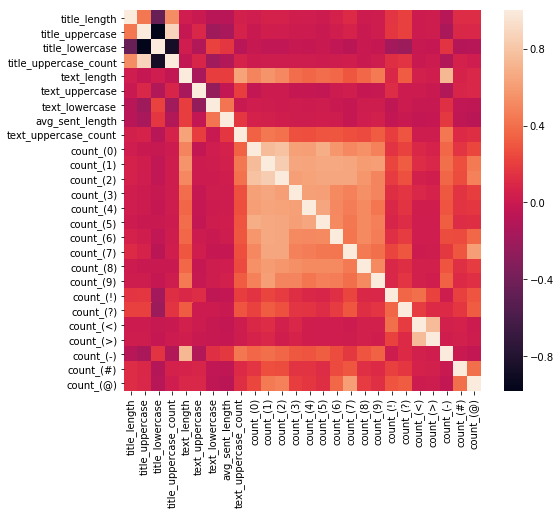

In [34]:
plt.rcParams['figure.figsize'] = (8,7)
fig,ax = plt.subplots()
ax = sns.heatmap(correlation.round(2))
plt.show()
#plt.savefig('./images/heatmap.pdf',bbox_inches='tight')

#### Correlation with target

In [35]:
structural_features2 = [col for col in data.columns if col not in ['title','text','subject','date']]

In [36]:
subdata = data[structural_features2]
subdata['label'] = subdata['label'].apply(lambda x :(x=='Fake')*1)

In [37]:
correlation = subdata.corr()

In [38]:
temp = correlation.loc['label']
temp.columns = ['value']
temp = pd.DataFrame(temp.drop('label'))
temp.columns = ['correlation']

In [39]:
final = temp.loc[temp['correlation'].abs()>0.1].T

In [40]:
final1 = final[[col for col in final.columns if 'count_' not in col]]
final2 = final[[col for col in final.columns if 'count_' in col]]

In [41]:
final1

,title_length,title_uppercase,title_lowercase,title_uppercase_count,text_lowercase,avg_sent_length,text_uppercase_count
correlation,0.581159,0.756811,-0.769785,0.548111,-0.160478,-0.165843,0.104969


In [42]:
final2

,count_(7),count_(!),count_(?),count_(-),count_(#),count_(@)
correlation,0.129443,0.22682,0.307477,-0.170916,0.14938,0.189084


### Structure data matrix

In [44]:
from utils.utils_metadata import get_structure

In [45]:
filepath = './data/rawdata/'
data = load_data(filepath)
data = get_structure(data)

In [46]:
data.head()

,title,text,label,title_length,title_uppercase,text_lowercase,avg_sent_length,text_uppercase_count,count_(?),count_(!),count_(#),count_(@),count_(-)
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,True,64,0.062500,0.765615,109.761905,12,0,0,0,0,5
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,True,64,0.062500,0.789061,126.250000,7,0,0,0,0,8
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,True,60,0.116667,0.765149,131.761905,7,0,0,0,0,2
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,True,59,0.135593,0.772857,135.555556,4,0,0,0,0,5
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,True,69,0.057971,0.754228,100.901961,15,1,1,0,0,5
